<a href="https://colab.research.google.com/github/MateoRivera/network-dynamics/blob/main/H3-Juliana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.1.2 Preferential Attachment Model

Generated graph with average degree: 7.0


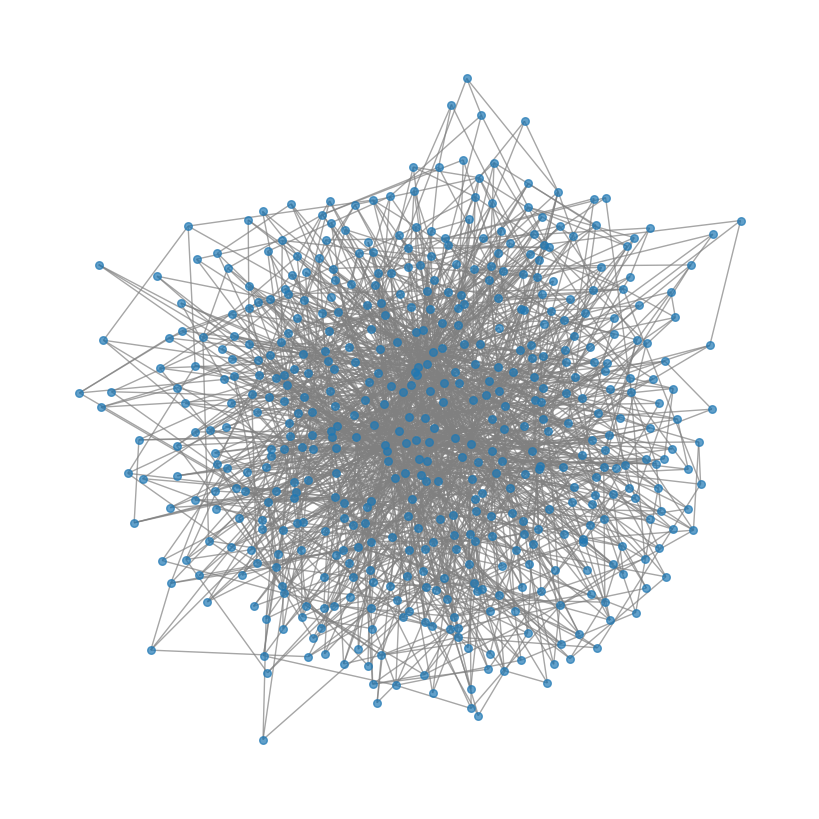

In [ ]:
import networkx as nx
import random

def preferential_attachment_graph(n, k):
    assert n > k + 1, "Number of nodes (n) must be greater than k + 1."

    # Initial complete graph with k + 1 nodes
    G = nx.complete_graph(k + 1)

    # Alternating strategy for odd k
    c_low = k // 2
    c_high = c_low + 1

    # At every time t>=2 create a new graph by adding a new node
    for t in range(k + 2, n + 1):
        G.add_node(t)

        # Calculate the degree of each existing node, serve as wi(t-1)
        degrees = dict(G.degree())
        total_degree = sum(degrees.values())

        # Calculate current average degree
        current_avg_degree = total_degree / G.number_of_nodes()

        # Decide the number of edges to add dynamically
        if current_avg_degree < k:
            c = c_high
        else:
            c = c_low

        # Select nodes to connect based on preferential attachment
        targets = set()

        # Loop helps to avoiding redundant edges to the same target
        while len(targets) < c:

            # Probability of connecting to an existing node is proportional to
            # its current degree wi(t-1)
            chosen = random.choices(
                population=list(degrees.keys()),
                weights=list(degrees.values()),
                k=1
            )[0]
            # Ensure no multiple links to the same node
            if chosen not in targets:
                targets.add(chosen)

        # Add edges between the new node and selected targets
        for target in targets:
            G.add_edge(t, target)


    # Post-generation adjustment to match desired average degree
    """These adjustments are random and might slightly alter the preferential
    attachment structure of the graph, but for large n, their effect is minimal
    because the overall degree distribution and structure remain close to what
    is expected from the preferential attachment model."""

    target_edges = n * k // 2 # Target total number of edges in the graph
    current_edges = G.number_of_edges()

    if current_edges < target_edges:
        while G.number_of_edges() < target_edges:
            u, v = random.sample(G.nodes(), 2)  # Randomly pick two distinct nodes
            if not G.has_edge(u, v): # Ensure there's no edge between them
                G.add_edge(u, v) # Add an edge between them
    elif current_edges > target_edges:
        while G.number_of_edges() > target_edges:
            edge = random.choice(list(G.edges()))  # Randomly pick an existing edge
            G.remove_edge(*edge) # Remove the chosen edge

    return G

# Example usage
n = 500  # Total number of nodes in the graph.
k = 7    # Desired average degree of the graph.
G = preferential_attachment_graph(n, k)

# Check average degree
average_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
print(f"Generated graph with average degree: {average_degree}")

# Visualize the graph (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
nx.draw_spring(G, node_size=30, edge_color='gray', alpha=0.7)
plt.show()
